### Importing Libraries 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv(r'Superstore.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [6]:
df.shape

(9994, 21)

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
print(df.drop_duplicates())

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [11]:
#transforming date into datetime
df['Order Date']= pd.to_datetime(df['Order Date'])
df['Ship Date']= pd.to_datetime(df['Ship Date'])
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

### Basic Analysis

In [13]:
# Getting top 10 most profitable orders
Top_10=df.sort_values('Profit',ascending=False).reset_index().head(10)
print(Top_10)

   index  Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0   6826    6827  CA-2016-118689 2016-10-02 2016-10-09  Standard Class   
1   8153    8154  CA-2017-140151 2017-03-23 2017-03-25     First Class   
2   4190    4191  CA-2017-166709 2017-11-17 2017-11-22  Standard Class   
3   9039    9040  CA-2016-117121 2016-12-17 2016-12-21  Standard Class   
4   4098    4099  CA-2014-116904 2014-09-23 2014-09-28  Standard Class   
5   2623    2624  CA-2017-127180 2017-10-22 2017-10-24     First Class   
6    509     510  CA-2015-145352 2015-03-16 2015-03-22  Standard Class   
7   8488    8489  CA-2016-158841 2016-02-02 2016-02-04    Second Class   
8   7666    7667  US-2016-140158 2016-10-04 2016-10-08  Standard Class   
9   6520    6521  CA-2017-138289 2017-01-16 2017-01-18    Second Class   

  Customer ID         Customer Name      Segment        Country  ...  \
0    TC-20980          Tamara Chand    Corporate  United States  ...   
1    RB-19360          Raymond Buch     C

In [14]:
# Getting orders with Sales > $1000
s1000 = df['Order ID'][df['Sales']>1000.0]
print(s1000)

10      CA-2014-115812
24      CA-2015-106320
27      US-2015-150630
35      CA-2016-117590
54      CA-2016-105816
             ...      
9866    US-2015-116981
9925    CA-2015-159534
9929    CA-2016-129630
9947    CA-2017-121559
9948    CA-2017-121559
Name: Order ID, Length: 468, dtype: object


In [15]:
# Getting orders from a specific region (west)
West_reg = df['Order ID'][df['Region']=='West']
print(West_reg)

2       CA-2016-138688
5       CA-2014-115812
6       CA-2014-115812
7       CA-2014-115812
8       CA-2014-115812
             ...      
9986    CA-2016-125794
9990    CA-2017-121258
9991    CA-2017-121258
9992    CA-2017-121258
9993    CA-2017-119914
Name: Order ID, Length: 3203, dtype: object


In [16]:
sales_by_region = df.groupby('Region')['Sales'].sum()
print(sales_by_region)

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64


In [17]:
# Average profit by category
Avg_profit_by_category= df.groupby('Category')['Profit'].mean().reset_index()
print(Avg_profit_by_category)

          Category     Profit
0        Furniture   8.699327
1  Office Supplies  20.327050
2       Technology  78.752002


In [18]:
# Calculating Profit Margin (%)
df['Profit Margin']=(df['Profit']/df['Sales'])*100
print(df.head(2))

# Average Profit Margin
avg_margin = df['Profit Margin'].mean()
print(f"Average Profit Margin: {avg_margin:.2f}%")

   Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   

  Customer Name   Segment        Country       City  ... Region  \
0   Claire Gute  Consumer  United States  Henderson  ...  South   
1   Claire Gute  Consumer  United States  Henderson  ...  South   

        Product ID   Category Sub-Category  \
0  FUR-BO-10001798  Furniture    Bookcases   
1  FUR-CH-10000454  Furniture       Chairs   

                                        Product Name   Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.96        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94        3   

   Discount    Profit  Profit Margin  
0       0.0   41.9136           16.0  
1       0.0  219.5820           30.0  

[2 rows x 22 columns]
Average Profit Margin: 12.03%


In [19]:
# Categorizing profit margin (High/Low)
df['Profit Category']=np.where(df['Profit Margin']>10,'High','Low')
print(df.head(5))

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   


In [20]:
# Monthly sales trend
df['Month_year']= df['Order Date'].dt.to_period('M') #extracting month and year from order date
Monthly_sale=df.groupby('Month_year')['Sales'].sum().reset_index()
print(Monthly_sale)

   Month_year        Sales
0     2014-01   14236.8950
1     2014-02    4519.8920
2     2014-03   55691.0090
3     2014-04   28295.3450
4     2014-05   23648.2870
5     2014-06   34595.1276
6     2014-07   33946.3930
7     2014-08   27909.4685
8     2014-09   81777.3508
9     2014-10   31453.3930
10    2014-11   78628.7167
11    2014-12   69545.6205
12    2015-01   18174.0756
13    2015-02   11951.4110
14    2015-03   38726.2520
15    2015-04   34195.2085
16    2015-05   30131.6865
17    2015-06   24797.2920
18    2015-07   28765.3250
19    2015-08   36898.3322
20    2015-09   64595.9180
21    2015-10   31404.9235
22    2015-11   75972.5635
23    2015-12   74919.5212
24    2016-01   18542.4910
25    2016-02   22978.8150
26    2016-03   51715.8750
27    2016-04   38750.0390
28    2016-05   56987.7280
29    2016-06   40344.5340
30    2016-07   39261.9630
31    2016-08   31115.3743
32    2016-09   73410.0249
33    2016-10   59687.7450
34    2016-11   79411.9658
35    2016-12   96999.0430
3

In [21]:
Monthly_sale['Month_year'] = Monthly_sale['Month_year'].dt.to_timestamp()

### Data Visualisation

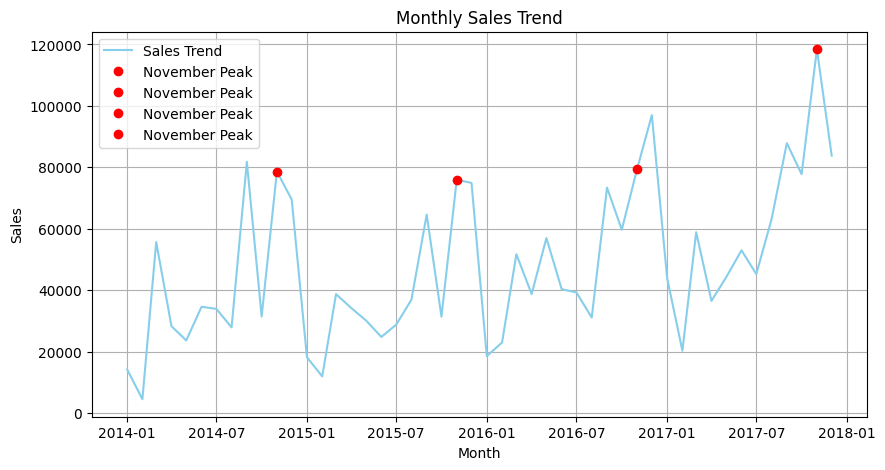

In [23]:
# Plot the main line
plt.figure(figsize=(10,5))
plt.plot(Monthly_sale['Month_year'], Monthly_sale['Sales'], label='Sales Trend', color='skyblue')

# Highlight November
for i, (month, sales) in enumerate(zip(Monthly_sale['Month_year'], Monthly_sale['Sales'])):
   if month.month == 11:
        plt.plot(month, sales, 'ro', label='November Peak')  # Red dot

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


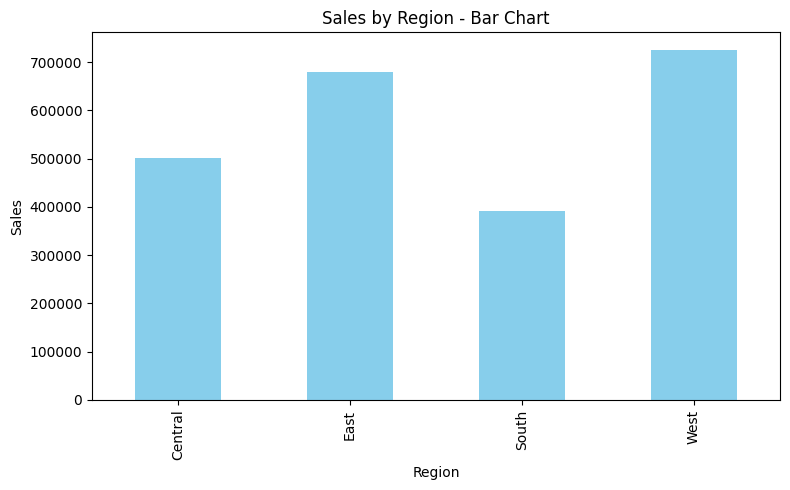

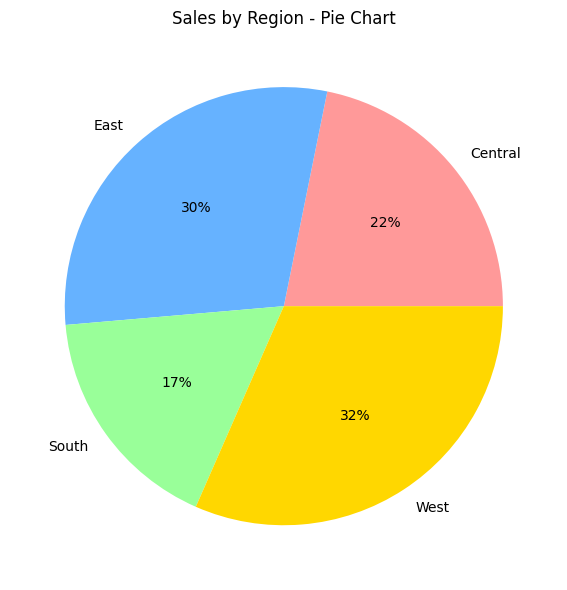

In [24]:
# Bar plot of sales by region
sales_by_region.plot(
    kind='bar',
    color='skyblue',
    figsize=(8, 5)
)
plt.title('Sales by Region - Bar Chart')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FFCCCB']

sales_by_region.plot.pie(
    autopct='%1.0f%%',
    colors=colors,
    figsize=(6, 6),
    ylabel='',
)
plt.title('Sales by Region - Pie Chart')
plt.tight_layout()
plt.show()


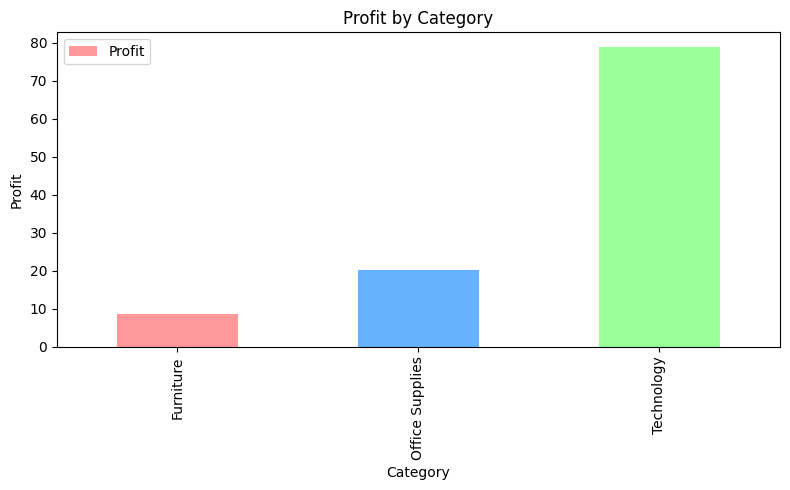

In [25]:
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FFCCCB']  
Avg_profit_by_category.plot(
    x='Category',
    y='Profit',
    kind='bar',
    color=colors[:len(Avg_profit_by_category)], 
    figsize=(8, 5)
)
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()


Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64


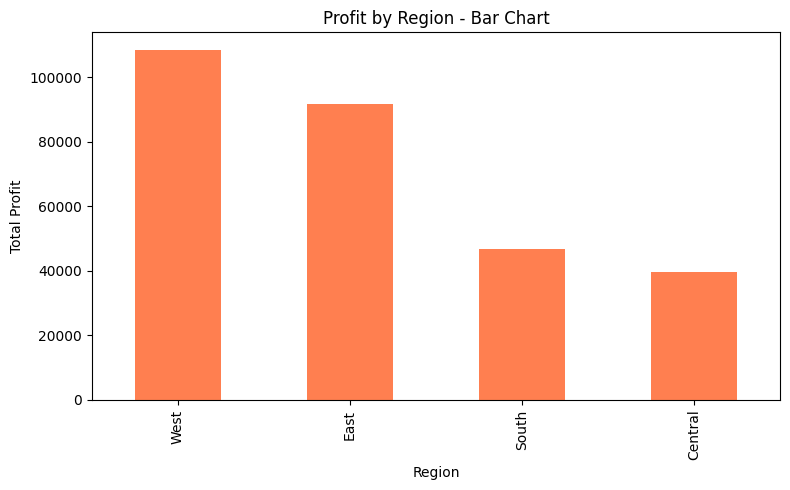

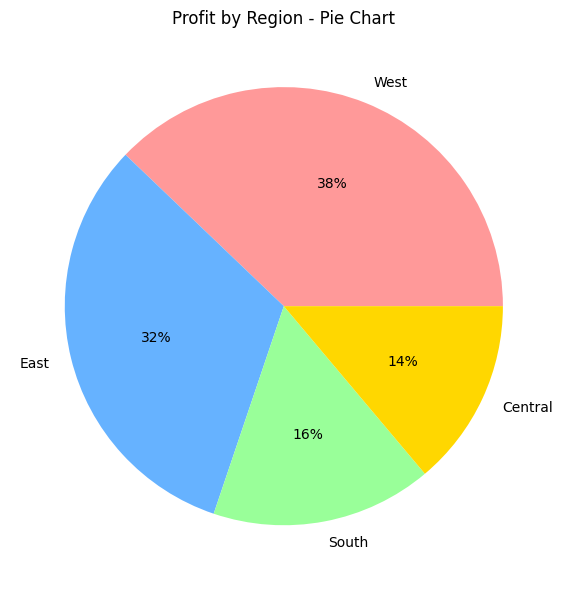

In [26]:
# Total Profit by Region
profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
print(profit_by_region)

# Bar Plot
profit_by_region.plot(
    kind='bar',
    color='coral',  
    figsize=(8, 5)
)
plt.title('Profit by Region - Bar Chart')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

#  Pie Chart with Custom Colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FFCCCB'] 

profit_by_region.plot.pie(
    autopct='%1.0f%%',
    colors=colors[:len(profit_by_region)],
    figsize=(6, 6),
    ylabel='',       
    legend=False
)

plt.title('Profit by Region - Pie Chart')
plt.tight_layout()
plt.show()

          Category        Sales
2       Technology  836154.0330
0        Furniture  741999.7953
1  Office Supplies  719047.0320


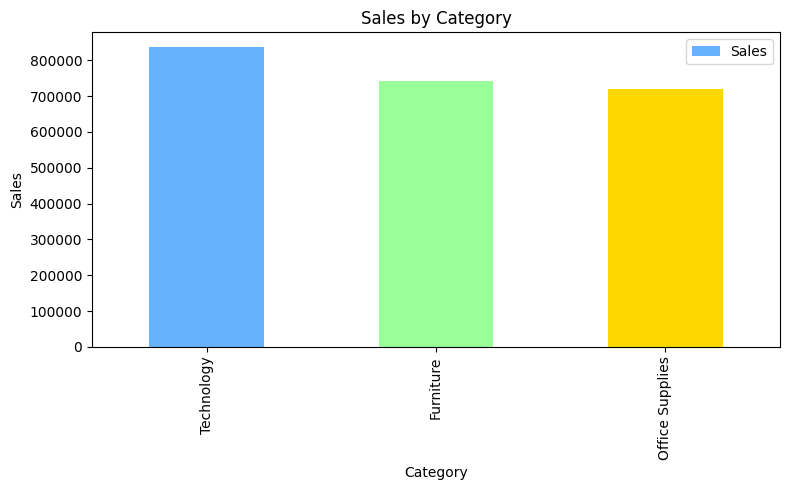

In [27]:
# Grouping and sorting sales by category
sales_by_Category = df.groupby('Category')['Sales'].sum().reset_index().sort_values('Sales', ascending=False)
print(sales_by_Category)

# Custom colors for each bar 
colors = ['#66B2FF', '#99FF99', '#FFD700', '#FF9999', '#FFCCCB']

# Plotting 
sales_by_Category.plot(
    x='Category',
    y='Sales',
    kind='bar',
    color=colors[:len(sales_by_Category)],
    figsize=(8, 5)
)

plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

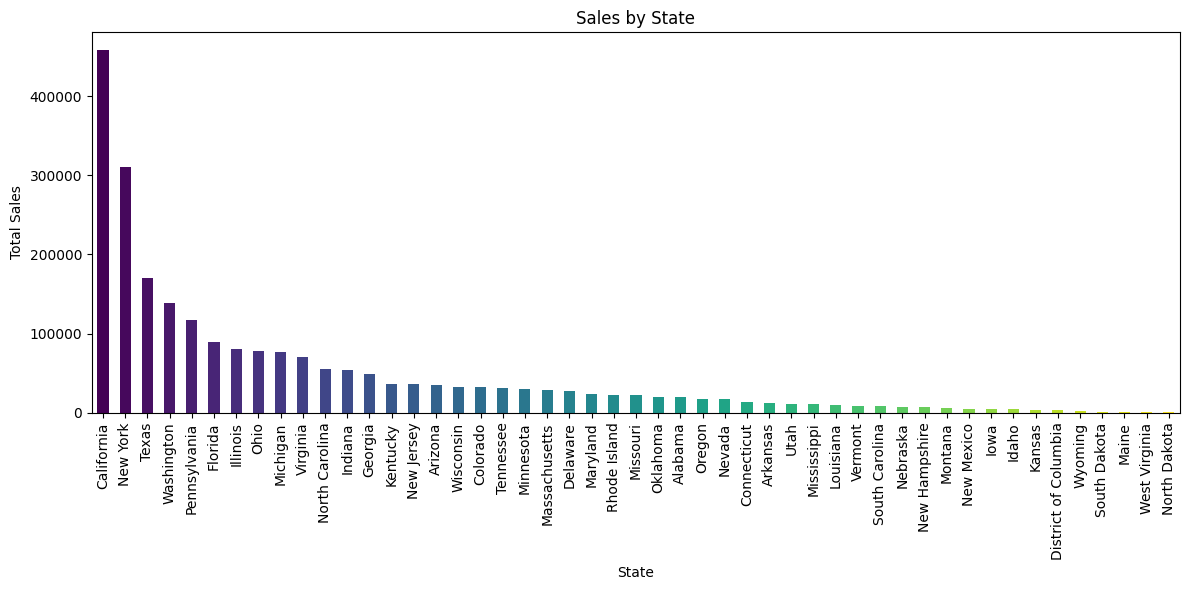

In [28]:
# Grouping sales by state
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
print(sales_by_state)

import matplotlib.cm as cm
# N distinct colors based on the number of states
num_states = len(sales_by_state)
colors = cm.viridis(np.linspace(0, 1, num_states))

# Plotting
sales_by_state.plot.bar(
    color=colors,
    figsize=(12, 6)
)

plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

State
California              76381.3871
New York                74038.5486
Washington              33402.6517
Michigan                24463.1876
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

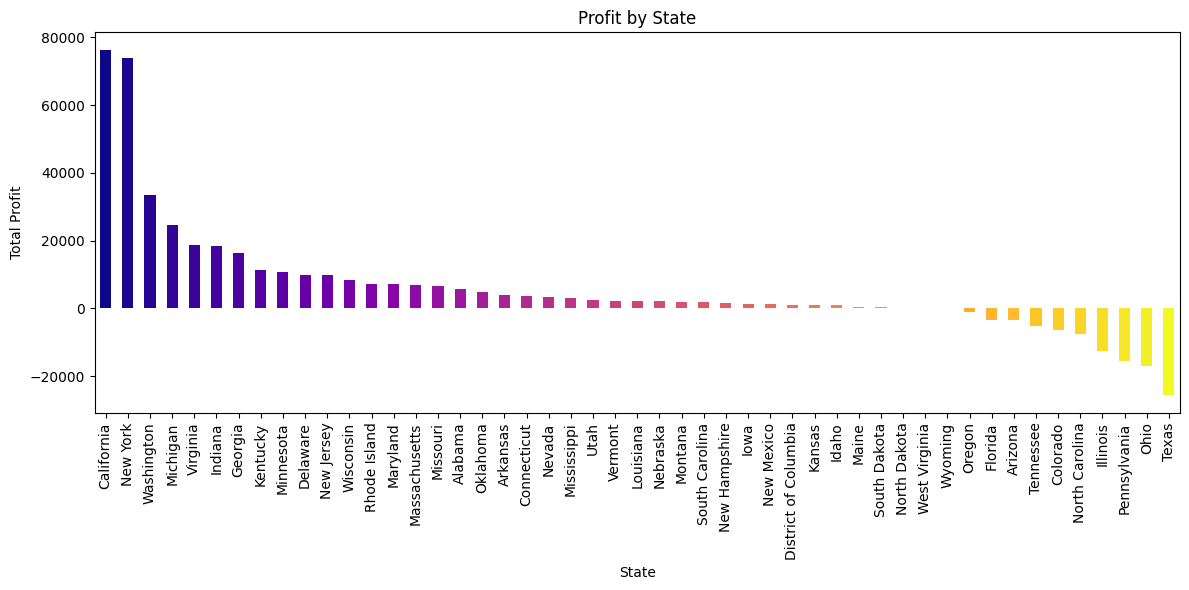

In [29]:
# Grouping profit by state
Profit_by_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
print(Profit_by_state)

# Generate N distinct colors
num_states = len(Profit_by_state)
colors = cm.plasma(np.linspace(0, 1, num_states))  

# Plotting 
Profit_by_state.plot.bar(
    color=colors,
    figsize=(12, 6)
)
plt.title('Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Customer Segmentation Analysis:
                     Sales       Profit  Customer Count
Segment                                               
Consumer     1.161401e+06  134119.2092             409
Corporate    7.061464e+05   91979.1340             236
Home Office  4.296531e+05   60298.6785             148


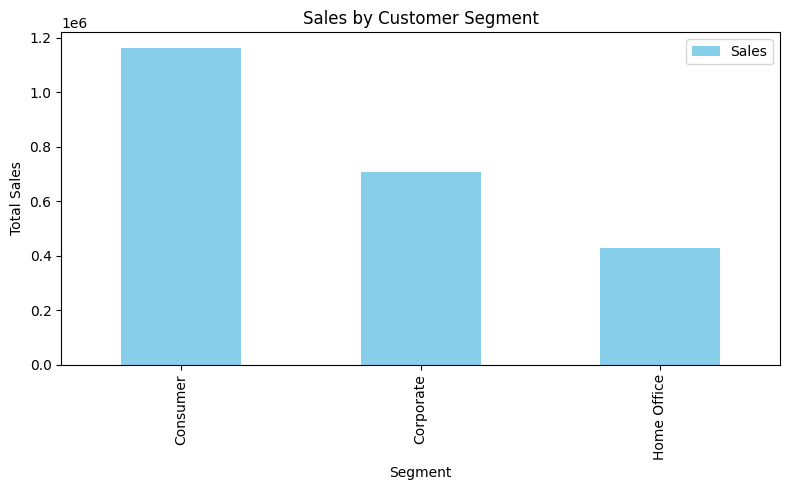

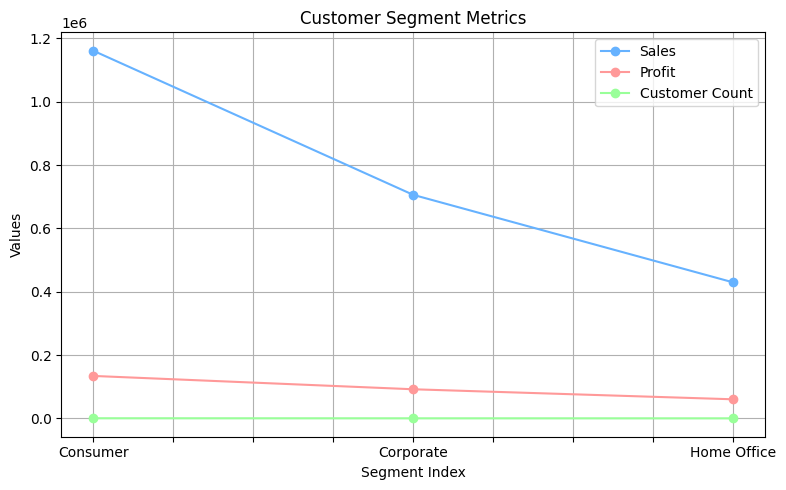

In [30]:
#Customer Segmentation

#count orders per customer
customer_insight=df['Customer ID'].value_counts().reset_index()
customer_insight.columns=['Customer ID','Order Count']

# Segment customers
customer_segment=np.where(customer_insight['Order Count']>1,'Regular Customer','One-tym Customer')
customer_insight['Customer segment']=customer_segment

# Analyze segment performance
segment_stats = df.merge(customer_insight, on='Customer ID').groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'Customer Count'})

print("Customer Segmentation Analysis:\n", segment_stats)
# Bar plot 
segment_stats.reset_index().plot(
    x='Segment',
    y='Sales',
    kind='bar',
    color='skyblue',
    figsize=(8, 5)
)

plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# Line plot for all metrics by segment
segment_stats.plot(
    kind='line',
    color=['#66B2FF', '#FF9999', '#99FF99'],  
    marker='o',
    figsize=(8, 5)
)

plt.title('Customer Segment Metrics')
plt.xlabel('Segment Index')
plt.ylabel('Values')
plt.grid(True)
plt.tight_layout()
plt.show()


### Data Cleaning

In [32]:
df = pd.read_csv("Superstore.csv",index_col=False, parse_dates=["Order Date", "Ship Date"], encoding="cp1252")

df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace
df.columns = df.columns.str.replace('\xa0', ' ', regex=False)  # Replace non-breaking space (U+00A0)
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  # Normalize all whitespace
df.columns = df.columns.str.replace('\n', '', regex=False)  # Remove newline characters
# Drop unnecessary columns
if "Row ID" in df.columns:
    df.drop(columns=["Row ID"], inplace=True)
    print("✅ 'Row ID' column dropped successfully.")
else:
    print("⚠️ 'Row ID' column not found after cleaning.")

# Drop rows with critical missing values
df.dropna(subset=["Order Date", "Ship Date", "Customer ID", "Product ID"], inplace=True)

# Fill non-critical values
if "Postal Code" in df.columns:
    df["Postal Code"].fillna(0, inplace=True)

# Add a calculated column for delivery delay in days
df["Delivery Delay"] = (df["Ship Date"] - df["Order Date"]).dt.days

✅ 'Row ID' column dropped successfully.


### Build Dimension

In [34]:
# --- Customer Dimension ---
dim_customer = df[["Customer ID", "Customer Name", "Segment"]].drop_duplicates()

# --- Product Dimension ---
dim_product = df[["Product ID", "Product Name", "Category", "Sub-Category"]].drop_duplicates()

# --- Regional Dimension ---
dim_region = df[["Country", "State", "Region", "City", "Postal Code"]].drop_duplicates().reset_index(drop=True)
dim_region["Region ID"] = dim_region.index + 1  # Surrogate key

# --- Shipping Mode Dimension ---
dim_transport = df[["Ship Mode"]].drop_duplicates().reset_index(drop=True)
dim_transport["Transport ID"] = dim_transport.index + 1  # Surrogate key

# --- Date Dimension based on Order Date ---
dim_date = pd.DataFrame()
dim_date["Order Date"] = pd.to_datetime(df["Order Date"].unique())
dim_date["Date Key"] = dim_date["Order Date"].dt.strftime("%Y%m%d").astype(int)  # YYYYMMDD integer format
dim_date["Year"] = dim_date["Order Date"].dt.year
dim_date["Month"] = dim_date["Order Date"].dt.month
dim_date["Quarter"] = dim_date["Order Date"].dt.quarter
dim_date["Weekday"] = dim_date["Order Date"].dt.day_name()

# Build Fact Table

In [36]:
# Merge foreign keys into the fact table
merged_df = df.merge(dim_region, on=["Country", "State", "Region", "City", "Postal Code"], how="left")
merged_df = merged_df.merge(dim_transport, on="Ship Mode", how="left")

# Create the Date Key for the fact table
merged_df["Date Key"] = merged_df["Order Date"].dt.strftime("%Y%m%d").astype(int)

# Final Fact Table (fact_sales) containing business measures
fact_sales = merged_df[[
    "Order ID", "Customer ID", "Product ID",
    "Region ID", "Transport ID", "Date Key",
    "Quantity", "Sales", "Discount", "Profit", "Delivery Delay"
]]

### Load and Export to CSV

In [38]:
# Save all dimension and fact tables as CSV files (simulate loading into a data warehouse)
dim_customer.to_csv("dim_customer.csv", index=False)
dim_product.to_csv("dim_product.csv", index=False)
dim_region.to_csv("dim_region.csv", index=False)
dim_date.to_csv("dim_date.csv", index=False)
dim_transport.to_csv("dim_transport.csv", index=False)
fact_sales.to_csv("fact_sales.csv", index=False)

### Preparing Data for Prophet

In [40]:
# Converting dates
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregating daily sales
sales_daily = df.groupby('Order Date')['Sales'].sum().reset_index()

# Renaming columns for Prophet
sales_daily.columns = ['ds', 'y']

print(sales_daily.head())

          ds         y
0 2014-01-03    16.448
1 2014-01-04   288.060
2 2014-01-05    19.536
3 2014-01-06  4407.100
4 2014-01-07    87.158


In [41]:
df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})

In [42]:
print(df.columns)

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'y',
       'Quantity', 'Discount', 'Profit', 'Delivery Delay'],
      dtype='object')


In [43]:
df_prophet = df.rename(columns={'Order Date': 'ds'})

In [44]:
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

### Fit Prophet Model

In [46]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet[['ds', 'y']])

23:38:52 - cmdstanpy - INFO - Chain [1] start processing
23:38:53 - cmdstanpy - INFO - Chain [1] done processing


### Future Predictions

In [48]:
future = model.make_future_dataframe(periods=90)  # forecast for next 90 days
forecast = model.predict(future)

### Plot the Forecast with Labels

23:38:53 - cmdstanpy - INFO - Chain [1] start processing
23:38:53 - cmdstanpy - INFO - Chain [1] done processing


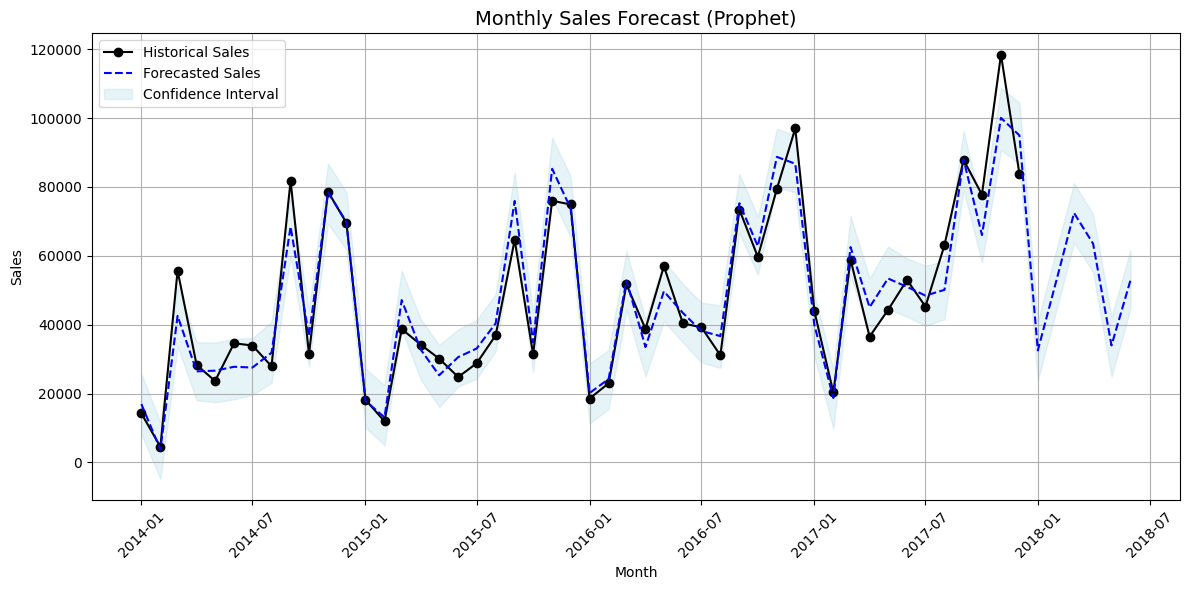

In [50]:
# Aggregate sales monthly
monthly_sales = df.groupby(pd.to_datetime(df['Order Date']).dt.to_period('M'))['y'].sum().reset_index()
monthly_sales['ds'] = monthly_sales['Order Date'].dt.to_timestamp()
monthly_sales = monthly_sales.rename(columns={'y': 'y'})

# Fit Prophet
from prophet import Prophet
model = Prophet()
model.fit(monthly_sales[['ds', 'y']])

# Forecast next 6 months
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['ds'], monthly_sales['y'], label='Historical Sales', color='black', marker='o')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', color='blue', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                 color='lightblue', alpha=0.3, label='Confidence Interval')
plt.title('Monthly Sales Forecast (Prophet)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# Sort by date
df_prophet = df_prophet.sort_values('ds')

# Split point
split_date = df_prophet['ds'].max() - pd.Timedelta(days=90)

train = df_prophet[df_prophet['ds'] <= split_date]
test = df_prophet[df_prophet['ds'] > split_date]

In [52]:
from prophet import Prophet

model = Prophet()
model.fit(train)

23:38:54 - cmdstanpy - INFO - Chain [1] start processing
23:38:54 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

In [54]:
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()

In [55]:

forecast = forecast.set_index('ds')
test = test.set_index('ds')

# only the predicted values that correspond to the test dates
forecast_test = forecast.loc[test.index]

# Calculate MAE and RMSE
mae = mean_absolute_error(test['y'], forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(test['y'], forecast_test['yhat']))


print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")


MAE (Mean Absolute Error): 267.06
RMSE (Root Mean Squared Error): 646.21
